# Learn and Focus? By Year

In [1]:
import pandas as pd
df_master_file = pd.read_excel("Student_lemmatized_with_GOALS.xlsx", engine = "openpyxl")

In [2]:
df_master_file.sample(1)

,Respondent ID,Work Terms,Class (BOT),College Code,Major Code,Coop Conc,Citizenship Status,Co-op #,Classroom activities,Coursework,Most important skills,Skills to develop,What made job interesting,Learn and Focus,goal,year
4006,1969,201415-201425,JR,B,ENTR,4COP,Non US Citizen,Only,experience appreciate precious experience drex...,not think coursework apply job,comunicate,idea,NaN,learn finance account like actual business,learn finance account like actual business,2014


### Group by "Questions" and Filtered

In [4]:
def group_by_col_question(by_col, question):
    cols = df_master_file[by_col].unique()
    df_grouped_year = pd.DataFrame(index = cols, columns = [question])
    for y in cols:
        df_grouped_year.loc[y] = df_master_file[df_master_file[by_col] == y][question].str.cat(sep = " ")
    return df_grouped_year

In [5]:
by_col = 'year'
question = "goal"


df_grouped_year = group_by_col_question(by_col, question)
df_grouped_year.sample(3)

,goal
2015,serve realistic representation expect enter co...
2020,want hand experience tax return preparation pl...
2017,devoted interest business intelligence analyst...


In [6]:
df_grouped_year.shape

(7, 1)

# Creating Document Term Matrix (Classroom Activities)

In [13]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(ngram_range = (3,3))

data=cv.fit_transform(df_grouped_year[question])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names_out())
df_dtm.index=df_grouped_year.index
df_dtm.head(3)




,aah hype trading,aalhe conference specifically,aall photo client,aanda half hour,aapi issue community,aaron able social,ab amazing learning,abandon ththem prioritize,abby read page,abc billion company,...,zoryana kupetsky financial,zubarev store keep,zuleba executive breakfast,zumtobel group able,zumtobel group international,zyrtec allergy drug,zyrtec change website,zyrtec little allergy,zyrtec make spring,zyrtec team want
2016,0,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2019,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Creating Word Frequency 

In [9]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [14]:
df_grouped = group_by_col_question(by_col, question)

cv=CountVectorizer(ngram_range = (3,3))
data=cv.fit_transform(df_grouped[question])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names_out())
df_dtm.index=df_grouped.index

In [15]:
word_freqs_1 = df_dtm.sum(axis=0).sort_values(ascending=False)[:100].to_dict()

In [22]:
word_freqs_1 = {
'cooperative education experience': 131,
 'management information system': 124,
 'meet new people': 110,
 'experience relate professional': 103,
 'want pursue career': 98,
 'improve communication skill': 92,
 'learn new thing': 88,
  'time management skill': 85,
'people different background': 82,

 'supply chain management': 73,
 'work life balance': 61,
 'big accounting firm': 59,
 'private wealth managthement': 57,
 'new york city': 56,
 'outside comfort zone': 54,
 'learn new skill': 53,
 'work large company': 52,
 'public accounting firm': 52,
 'not sure want': 51,
 'work small company': 51,
 'work big company': 49,
 'finance business analytic': 46,
 'business analytic major': 45,
 'real life experience': 44,
 'learn much possible': 44,
 'attend law school': 43,
 'social media marcheting': 41,
 'commercial real estate': 41,
 'go law school': 38,
 'improve excel skill': 37,
 'work law firm': 37}

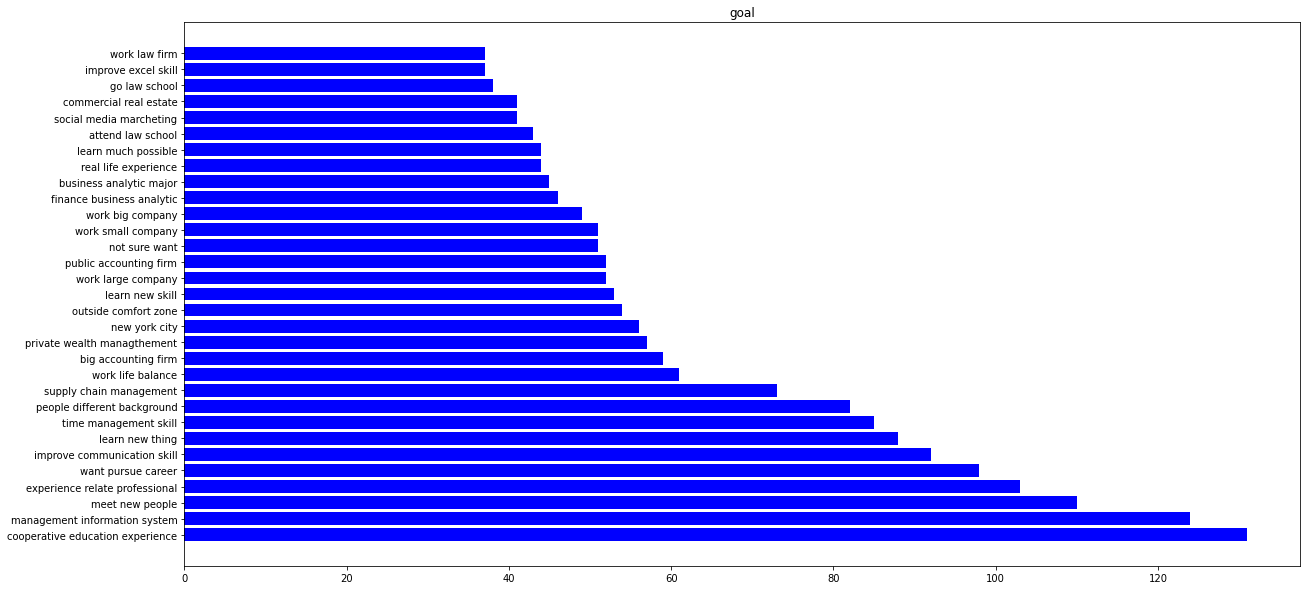

In [23]:
from tqdm import tqdm

#junk_words = ["very important", "skill ability","skill time", "skill learn", "skill important", "important skill","skill like","focus get", "like continue", "class learn", "well understanding", "class hope", "marcheting class", "major want", "want focus", "return class", "want learn", "like focus", "class want", "like learn", "class like", "focus learn", "focus finance", "skill want", "want continue", "look forward", "learn focus", "focus class", "focus major" ]

   


#word_freqs_1 = df_dtm.sum(axis=0).sort_values(ascending=False)[0:35].to_dict()

#for i in tqdm(junk_words):
 #   if i in word_freqs_1:
  #      del word_freqs_1[i]



plt.figure(figsize = (20, 10))

plt.title(question)
plt.barh(range(len(word_freqs_1)), word_freqs_1.values(),color='blue')

plt.yticks(range(len(word_freqs_1)), word_freqs_1.keys())
plt.yticks(rotation = 0) 
plt.show()

In [12]:
junk_words = junk_words = ["very important", "skill ability","skill time", "skill learn", "skill important", "important skill","skill like","focus get", "like continue", "class learn", "well understanding", "class hope", "marcheting class", "major want", "want focus", "return class", "want learn", "like focus", "class want", "like learn", "class like", "focus learn", "focus finance", "skill want", "want continue", "look forward", "learn focus", "focus class", "focus major" ]


In [11]:
word_freqs_1= {
 'feel very prepared': 870,
 'classroom activity help': 634,
 'class not help': 589,
 'recent cooperative education': 399,
 'business class help': 375,
 'real life example': 285,
 'management information system': 228,
 'business communication class': 207,
 'group project class': 169,
 'skill learn class': 162,
 'real world experience': 141,
 'time management skill': 126,
 'take finance class': 96,
'job prepare student': 82,
 'take marketing class': 72,
 'major specific class': 71,}

In [16]:
word_freqs_2 = {
 'business class': 1158,
 'cooperative education': 921,
 'group project': 868,
 'education experience': 844,
 'finance class': 686,
 'accounting class': 635,
 'communication skill': 631,
 'business communication': 626,
 'excel skill': 585,
 'time managthement': 484,
 'work experience': 484,
 'marketing class': 480,
 'use excel': 452,}
 

In [24]:
word_freqs_1 = {
'business class': 1158,
'excel class': 962,
'cooperative education': 921,
'group project': 868,
 'finance class': 686,
 'accounting class': 635,
 'business communication': 626,
 'time management': 484,
 'marketing class': 480,
}
 
 

In [24]:
for i in tqdm(junk_words):
    if i in word_freqs_1:
        print(i)
        del word_freqs_1[i]

100%|████████████████████████████████████████| 41/41 [00:00<00:00, 59257.91it/s]


## Creating Word Frequency (Coursework)

In [12]:
junk_words = ["classroom activity", "very important", "skill ability","skill time", "skill learn", "skill important", "important skill","skill like","focus get", "like continue", "class learn", "well understanding", "class hope", "marcheting class", "major want", "want focus", "return class", "want learn", "like focus", "class want", "like learn", "class like", "focus learn", "focus finance", "skill want", "want continue", "look forward", "learn focus", "focus class", "focus major" ]


In [13]:
rows = list(df_dtm.index.values)
for i in tqdm(junk_words):
    if i in rows:
        rows.pop(i)
df_dtm = df_dtm.loc[rows]

100%|████████████████████████████████████████| 30/30 [00:00<00:00, 22203.83it/s]


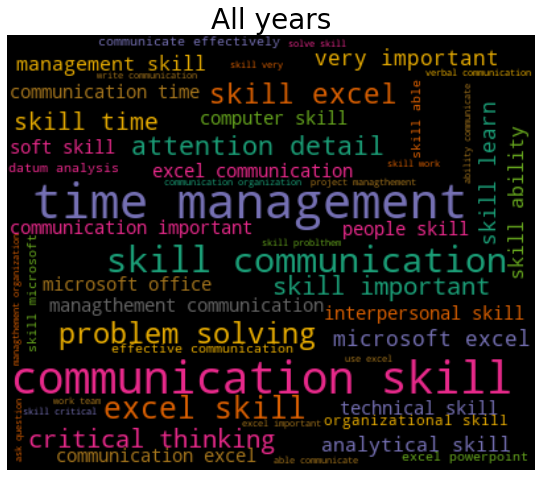

In [56]:
from wordcloud import WordCloud
from textwrap import wrap
import matplotlib.pyplot as plt

# Function for generating word clouds
def generate_wordcloud(data,title):
    wc = WordCloud(width=400, height=330, max_words=50,colormap = "Dark2").generate_from_frequencies(data)
    plt.figure(figsize=(16,8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title('\n'.join(wrap(str(title),60)),fontsize=28)
    plt.show()

#Transposing document term matrix
#df_dtm=df_dtm.transpose()

# Plotting word cloud for each product




generate_wordcloud(df_dtm["all_years"].sort_values(ascending=False)[0:1000], title = "All years")
#generate_wordcloud(df_dtm.iloc[0].sort_values(ascending=False),"2016")

In [28]:
df_dtm["all_years"] = df_dtm[[2016, 2019, 2020, 2018, 2014, 2017, 2015]].sum(axis=1)

In [24]:
df['Sum']=df[col_list]. sum(axis=1) to get the total sum.

SyntaxError: invalid syntax (4002352163.py, line 1)

In [30]:
df_dtm.columns

Index([2016, 2019, 2020, 2018, 2014, 2017, 2015, 'all_years'], dtype='object')

In [20]:
df_dtm

,abbreviation comcast,abbreviation mention,abilit prioritize,ability ability,ability able,ability accept,ability adapt,ability adjust,ability analysis,ability analyze,...,zendesk slack,zero learn,zoho crm,zone difference,zone diligent,zone effective,zone piece,zone subject,zone webex,zoominfo etc
2016,0,0,0,2,0,2,2,0,0,4,...,1,0,0,1,0,0,0,0,0,0
2019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018,0,0,0,3,4,0,10,1,0,3,...,0,0,0,0,0,0,0,0,0,1
2014,0,0,0,1,1,1,4,0,1,2,...,0,0,1,0,1,1,1,0,0,0
2017,0,0,0,0,1,1,5,0,0,4,...,0,0,0,0,0,0,0,1,1,0
2015,1,1,1,0,0,0,4,1,0,4,...,0,1,0,0,0,0,0,0,0,0


In [52]:
df_dtm.rename(index = {"time managthement":"time management", "problthem solve":"problem solving", "managthement skill": "management skill"}, inplace = True)

In [55]:
df_dtm.drop(["important skill"], inplace = True)

In [45]:
help(df_dtm.rename)

Help on method rename in module pandas.core.frame:

rename(mapper: 'Renamer | None' = None, *, index: 'Renamer | None' = None, columns: 'Renamer | None' = None, axis: 'Axis | None' = None, copy: 'bool | None' = None, inplace: 'bool' = False, level: 'Level' = None, errors: 'IgnoreRaise' = 'ignore') -> 'DataFrame | None' method of pandas.core.frame.DataFrame instance
    Alter axes labels.
    
    Function / dict values must be unique (1-to-1). Labels not contained in
    a dict / Series will be left as-is. Extra labels listed don't throw an
    error.
    
    See the :ref:`user guide <basics.rename>` for more.
    
    Parameters
    ----------
    mapper : dict-like or function
        Dict-like or function transformations to apply to
        that axis' values. Use either ``mapper`` and ``axis`` to
        specify the axis to target with ``mapper``, or ``index`` and
        ``columns``.
    index : dict-like or function
        Alternative to specifying axis (``mapper, axis=0``
     